# **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from LDA_SCRATCH import LDA_SCRATCH

# **Load iris Dataset**

In [2]:
X, y = load_iris(return_X_y=True, as_frame=True)

In [3]:
X.shape

(150, 4)

In [4]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
y.shape

(150,)

In [6]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

# **Standardization**

In [7]:
# sc = StandardScaler()
# x_std = sc.fit_transform(X)

# **Split Dataset**

In [8]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0, stratify=y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)

In [9]:
print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)
print("X_test.shape: ", X_test.shape)
print("y_test.shape: ", y_test.shape)

X_train.shape:  (127, 4)
y_train.shape:  (127,)
X_test.shape:  (23, 4)
y_test.shape:  (23,)


# **LDA 4 Features**

##### **Built-in LDA**

In [10]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [11]:
predictions = LDA.predict(X_test)

In [12]:
LDA.score(X_train, y_train)

0.9763779527559056

In [13]:
accuracy = accuracy_score(y_test, predictions)
print('Accuracy Score =', accuracy * 100, '%')

Accuracy Score = 100.0 %


##### **LDA from scratch**

In [14]:
lda = LDA_SCRATCH()
X_train_df = pd.DataFrame(X_train)
lda.fit(X_train_df, y_train)

In [15]:
y_pred = lda.predict(X_test)
y_pred

array([[1, 0, 0],
       [0, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 1],
       [0, 1, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0]])

In [16]:
y_pred.shape

(23, 3)

In [17]:
accuracy, stats = lda.score(y_test, y_pred)
X_test_df = pd.DataFrame(X_test)
for sample, stat in zip(X_test_df.values, stats):
    print(sample, stat)

[5.5 3.5 1.3 0.2] Classified Correctly
[6.7 3.1 4.4 1.4] New classification
[5.8 2.7 4.1 1. ] Classified Correctly
[6.7 3.1 4.7 1.5] New classification
[4.9 3.1 1.5 0.1] Classified Correctly
[5.1 3.4 1.5 0.2] Classified Correctly
[5.8 2.7 5.1 1.9] Classified Correctly
[5.7 2.8 4.1 1.3] New classification
[5.5 2.6 4.4 1.2] Classified Correctly
[5.1 3.7 1.5 0.4] Classified Correctly
[4.6 3.1 1.5 0.2] Classified Correctly
[6.5 3.  5.2 2. ] Classified Correctly
[5.1 3.5 1.4 0.2] Classified Correctly
[7.2 3.  5.8 1.6] Classified Wrong
[5.6 3.  4.1 1.3] New classification
[7.  3.2 4.7 1.4] New classification
[6.3 3.4 5.6 2.4] Classified Correctly
[6.3 2.9 5.6 1.8] Undetermined Class
[5.7 2.8 4.5 1.3] Classified Correctly
[6.3 3.3 6.  2.5] Classified Correctly
[5.3 3.7 1.5 0.2] Classified Correctly
[5.1 3.8 1.5 0.3] Classified Correctly
[6.1 2.6 5.6 1.4] Classified Wrong


In [18]:
print('Accuracy Score = ', accuracy, '%')

Accuracy Score =  91.30434782608697 %


# **LDA 2 Features**

##### **LDA Dimensionality Reduction**

In [19]:
LDA = LinearDiscriminantAnalysis(n_components=2)
x_lda = LDA.fit_transform(X, y)

In [20]:
print("X_LDA.shape: ", x_lda.shape)

X_LDA.shape:  (150, 2)


##### **Split Dataset**

In [21]:
X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(x_lda, y, test_size=0.15, random_state=0, stratify=y)

In [22]:
print("X_train_LDA.shape: ", X_train_lda.shape)
print("y_train_LDA.shape: ", y_train_lda.shape)
print("X_test_LDA.shape: ", X_test_lda.shape)
print("y_test_LDA.shape: ", y_test_lda.shape)

X_train_LDA.shape:  (127, 2)
y_train_LDA.shape:  (127,)
X_test_LDA.shape:  (23, 2)
y_test_LDA.shape:  (23,)


##### **Built-in LDA**

In [23]:
LDA.fit(X_train_lda, y_train_lda)

LinearDiscriminantAnalysis(n_components=2)

In [24]:
predictions = LDA.predict(X_test_lda)

In [25]:
LDA.score(X_train_lda, y_train_lda)

0.9763779527559056

In [26]:
accuracy = accuracy_score(y_test_lda, predictions)
print('Accuracy Score =', accuracy * 100, '%')

Accuracy Score = 100.0 %


##### **LDA from scratch**

In [27]:
lda = LDA_SCRATCH()
x_train_lda_df = pd.DataFrame(X_train_lda)
lda.fit(x_train_lda_df, y_train_lda)

In [28]:
y_pred = lda.predict(X_test_lda)
y_pred

array([[1, 0, 0],
       [0, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 1],
       [0, 1, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0]])

In [29]:
y_pred.shape

(23, 3)

In [30]:
accuracy, stats = lda.score(y_test_lda, y_pred)
for sample, stat in zip(X_test_lda, stats):
    print(sample, stat)

[8.61367201 0.4032536 ] Classified Correctly
[-1.20117255  0.08443736] New classification
[-0.77685404 -1.65916185] Classified Correctly
[-2.14258208  0.08877978] New classification
[ 7.34305989 -0.94731921] Classified Correctly
[ 7.68823131 -0.00922362] Classified Correctly
[-5.50747997 -0.03581399] Classified Correctly
[-1.54948259 -0.59336358] New classification
[-2.4015702  -1.59458341] Classified Correctly
[7.58648117 1.20797032] Classified Correctly
[ 6.81320057 -0.67063107] Classified Correctly
[-4.9677409   0.82114055] Classified Correctly
[8.06179978 0.30042062] Classified Correctly
[-4.58371942 -0.85681581] Classified Wrong
[-1.32552574 -0.16286955] New classification
[-1.45927545  0.02854376] New classification
[-6.52449599  2.44503527] Classified Correctly
[-5.60545633 -0.34073806] Undetermined Class
[-2.42996725 -0.96613207] Classified Correctly
[-7.83947399  2.13973345] Classified Correctly
[8.31444876 0.64495318] Classified Correctly
[8.02097451 1.14050366] Classified Co

In [31]:
print('Accuracy Score = ', accuracy, '%')

Accuracy Score =  91.30434782608697 %


##### **Visualization**

In [32]:
data=pd.DataFrame(x_lda)
data['class']=y
data.columns=["LD1","LD2","class"]
data.head()

,LD1,LD2,class
0,8.061800,0.300421,0
1,7.128688,-0.786660,0
2,7.489828,-0.265384,0
3,6.813201,-0.670631,0
4,8.132309,0.514463,0


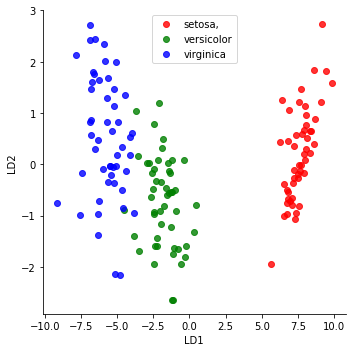

In [33]:
# markers = ['s', 'x','o']
colors = ['r', 'g','b']
sns.lmplot(x="LD1", y="LD2", data=data, hue='class',fit_reg=False,legend=False, palette=colors)
plt.legend(labels=["setosa,","versicolor", "virginica"], loc='upper center')
plt.show()

# **LDA 1 Feature**

##### **LDA Dimensionality Reduction**

In [34]:
LDA = LinearDiscriminantAnalysis(n_components=1)
x_lda = LDA.fit_transform(X, y)

In [35]:
print("X_LDA.shape: ", x_lda.shape)

X_LDA.shape:  (150, 1)


##### **Split Dataset**

In [36]:
X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(x_lda, y, test_size=0.15, random_state=0, stratify=y)

In [37]:
print("X_train_LDA.shape: ", X_train_lda.shape)
print("y_train_LDA.shape: ", y_train_lda.shape)
print("X_test_LDA.shape: ", X_test_lda.shape)
print("y_test_LDA.shape: ", y_test_lda.shape)

X_train_LDA.shape:  (127, 1)
y_train_LDA.shape:  (127,)
X_test_LDA.shape:  (23, 1)
y_test_LDA.shape:  (23,)


##### **Built-in LDA**

In [38]:
LDA.fit(X_train_lda, y_train_lda)

LinearDiscriminantAnalysis(n_components=1)

In [39]:
predictions = LDA.predict(X_test_lda)

In [40]:
LDA.score(X_train_lda, y_train_lda)

0.9763779527559056

In [41]:
accuracy = accuracy_score(y_test_lda, predictions)
print('Accuracy Score =', accuracy * 100, '%')

Accuracy Score = 100.0 %


##### **LDA from scratch**

In [42]:
lda = LDA_SCRATCH()
x_train_lda_df = pd.DataFrame(X_train_lda)
lda.fit(x_train_lda_df, y_train_lda)

In [43]:
y_pred = lda.predict(X_test_lda)
y_pred

array([[1, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1]])

In [44]:
y_pred.shape

(23, 3)

In [45]:
accuracy, stats = lda.score(y_test_lda, y_pred)
# X_test_df = pd.DataFrame(X_test)
for sample, stat in zip(X_test_lda, stats):
    print(sample, stat)

[8.61367201] Classified Correctly
[-1.20117255] New classification
[-0.77685404] New classification
[-2.14258208] New classification
[7.34305989] Classified Correctly
[7.68823131] Classified Correctly
[-5.50747997] Classified Correctly
[-1.54948259] New classification
[-2.4015702] New classification
[7.58648117] Classified Correctly
[6.81320057] Classified Correctly
[-4.9677409] Classified Correctly
[8.06179978] Classified Correctly
[-4.58371942] Classified Correctly
[-1.32552574] New classification
[-1.45927545] New classification
[-6.52449599] Classified Correctly
[-5.60545633] Classified Correctly
[-2.42996725] New classification
[-7.83947399] Classified Correctly
[8.31444876] Classified Correctly
[8.02097451] Classified Correctly
[-5.10748966] Classified Correctly


In [46]:
print('Accuracy Score = ', accuracy, '%')

Accuracy Score =  100.0 %


##### **Visualization**

In [47]:
data=pd.DataFrame(x_lda)
data['class']=y
data.columns=["LDA","class"]
data.head()

,LDA,class
0,8.061800,0
1,7.128688,0
2,7.489828,0
3,6.813201,0
4,8.132309,0


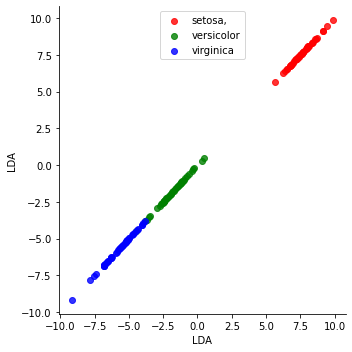

In [48]:
# markers = ['s', 'x','o']
colors = ['r', 'g','b']
sns.lmplot(x="LDA", y="LDA", data=data, hue='class',fit_reg=False,legend=False, palette=colors)
plt.legend(labels=["setosa,","versicolor", "virginica"], loc='upper center')
plt.show()